# Artificial Intelligence Class, ECE NTUA 2021-2022: Lab Project 3

    

---

The purpose of this project is the implementation of Machine Learning Algorithms that recognize a song's music genre among three different music genres. The Project is in Greek. We were provided with the dataset "movies_metadata.csv" by our instructors at ECE NTUA. 

Quick Summary in English
---
Part 1:  
Evaluation and preperation for the next parts of the Assignment.

Part 2:  
Implementation of kNN Algorithm. Comparison between our implementation and already existing implementations that are included in Python libraries.

Part 3:  
Implementation of Naive Bayes Algorithm. Comparison between our implementation and already existing implementations that are included in Python libraries.    

Part 4:  
Implementation of Multi-Layer Perceptron Algorithm. Comparison between our implementation and already existing implementations that are included in Python libraries.

---

### Περιγραφή
Στην άσκηση αυτή θα υλοποιηθούν διάφοροι (σχετικά απλοί) αλγόριθμοι μηχανικής μάθησης για την αυτόματη αναγνώριση μεταξύ 3 μουσικών είδών απο τα δεδομένα που προσφέρει η υπηρεσία Spotify. Συγκεκριμένα, θα δίνονται δύο σύνολα δεδομένων $$Ζ_{train}=\{(x_1,y_1),\dots,(x_n,y_n)\}$$ $$Z_{test} = \{(x_j,y_j),\dots{,(x_k,y_k)}\}$$ όπου κάθε $x_i\in{\mathbb{R}^p}$ είναι ένα διάνυσμα με τα μουσικά χαρακτηριστικά κάθε κομματιού (όπως dancability, acousticness κ.α.) και $y_i$ είναι το είδος του κομματιού - ένας ακέραιος στο $[0,2]$. Σε κάθε περίπτωση καλείστε να σχεδιάσετε έναν ταξινομητή, δηλαδή μια απεικόνιση $$f:\mathbb{R}^p\rightarrow{[0,2]}$$

# Part 1: Evaluation
Στο πρώτο μέρος της άσκησης θα υλοποιηθούν συναρτήσεις που θα χρησιμοποιηθούν για την αξιολόγηση των ταξινομητών που θα χρησιμοποιηθούν στα επόμενα μέρη.

Παρακάτω σας δίνεται η κλάση Evaluate, η οποία υπολογίζει διάφορες μετρικές με τη μέθοδο get_metrics, εντοπίζει αντικείμενα που ταξινομήθηκαν λάθος και τα εμφανίζει (μέθοδος get_sample_of_wrong), και υπολογίζει τον πίνακα σύγχυσης (confusion matrix) όπου οπτικοποιούνται ανά κατηγορία οι προβλέψεις του ταξινομητή.

Για το μέρος αυτό καλείστε να υλοποιήσετε στη μέθοδο my_accuracy τη μετρική accuracy, η οποία ορίζεται ως:
$$accuracy = \frac{\#σωστών\_προβλέψεων}{\#δεδομένων}$$



In [1]:

from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score
from matplotlib import pyplot as plt
import numpy as np
import random

from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score
from matplotlib import pyplot as plt
import numpy as np
import random

class Evaluate:
    def __init__(self, y_true, y_pred):
        self.y_true = y_true
        self.y_pred = y_pred

    def my_accuracy(self):
      y_true = self.y_true
      y_pred = self.y_pred
      
      ##################
      ## My code below
      acc=1
      length=len(y_true)
      number_accurate=0
      for check in range(len(y_true)):
        if (y_pred[check]==y_true[check]):
          number_accurate+=1
      acc = number_accurate/length
      ## My code above
      ##################
      return acc

    def get_metrics(self):
        precision = precision_score(self.y_true, self.y_pred, average = "macro")
        recall = recall_score(self.y_true, self.y_pred, average = "macro")
        f1 = f1_score(self.y_true, self.y_pred, average = "macro")
        results = {"precision": precision, "recall": recall, "f1": f1, "accuracy": self.my_accuracy()}
        return results   
    
    def confusion_matrix(self):
        cm = confusion_matrix(self.y_true, self.y_pred)
        return cm 

    def get_evaluation_report(self):
        metrics = self.get_metrics()
        for m in metrics:
            print(m + ': ' + str(metrics[m]))
        cm = self.confusion_matrix()
        print("Confusion matrix: ")
        print(cm)

Παράδειγμα χρήσης της κλάσης. Κανονικά στο x θα υπάρχουν τα δεδομένα από το dataset

In [2]:

y_true = [1, 0, 1, 0, 0, 1, 1, 0]
y_pred = [1, 0, 1, 0, 1, 1, 0, 0]

eval = Evaluate(y_true, y_pred)
eval.get_evaluation_report()

precision: 0.75
recall: 0.75
f1: 0.75
accuracy: 0.75
Confusion matrix: 
[[3 1]
 [1 3]]


# Dataset

To dataset που σας δίνεται περιέχει πληθώρα μουσικών κομματιών για τα οποία έχουν καταγραφεί διάφορα χαρακτηριστικά τους, όπως επίσης και το μουσικό είδος στο οποίο ανήκουν. Στη συγκεκριμένη άσκηση θα δουλέψουμε με ένα υποσύνολο (αριθμητικών) χαρακτηριστικών, τα οποία συνεισφέρουν στον καθορισμό της μουσικής κατηγορίας κάθε κομματιού.  

Τα χαρακτηριστικά τα οποία θα μελετήσουμε στην παρούσα άσκηση είναι τα "acousticness", "danceability", "energy", "instrumentalness", "liveness", "speechiness", ενώ οι κατηγορίες στις οποίες καλούμαστε να ταξινομήσουμε τα μουσικά κομμάτια είναι οι "Electronic", "Rock", και "Rap".  


In [3]:

# Connectoin betwee Google Drive and Google Collab

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Θα χρησιμοποιήσουμε τα DataFrames της βιβλιοθήκης pandas για να χειριστούμε τα δεδομένα μας. Μπορείτε να βρείτε περισσότερες πληροφορίες για τα pandas DataFrames στο αντίστοιχο [documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html).

In [4]:

import pandas as pd
from tqdm.notebook import tqdm 

In [5]:

# read data in the form of pandas DataFrame
data = pd.read_csv("/content/drive/My Drive/music_df_processed.csv")

# print the first 5 values of the DataFrame using .head() command
data.head()

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
0,32894.0,Röyksopp,Röyksopp's Night Out,27.0,0.00468,0.652,-1.0,0.941,0.79200,A#,0.115,-5.201,Minor,0.0748,100.889,4-Apr,0.759,Electronic
1,46652.0,Thievery Corporation,The Shining Path,31.0,0.01270,0.622,218293.0,0.890,0.95000,D,0.124,-7.043,Minor,0.0300,115.002,4-Apr,0.531,Electronic
2,30097.0,Dillon Francis,Hurricane,28.0,0.00306,0.620,215613.0,0.755,0.01180,G#,0.534,-4.617,Major,0.0345,127.994,4-Apr,0.333,Electronic
3,62177.0,Dubloadz,Nitro,34.0,0.02540,0.774,166875.0,0.700,0.00253,C#,0.157,-4.498,Major,0.2390,128.014,4-Apr,0.270,Electronic
4,24907.0,What So Not,Divide & Conquer,32.0,0.00465,0.638,222369.0,0.587,0.90900,F#,0.157,-6.266,Major,0.0413,145.036,4-Apr,0.323,Electronic


In [6]:

# What can we see here?
data.describe()

,instance_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
count,45020.000000,45020.000000,45020.000000,45020.000000,4.502000e+04,45020.000000,45020.000000,45020.000000,45020.000000,45020.000000,45020.000000,45020.000000
mean,55884.691892,44.263327,0.306596,0.558532,2.211695e+05,0.599553,0.181843,0.193951,-9.137016,0.093783,119.952961,0.456394
std,20728.197040,15.553972,0.341391,0.178858,1.276884e+05,0.264510,0.325847,0.161715,6.156400,0.101469,30.641701,0.247161
min,20002.000000,0.000000,0.000000,0.059600,-1.000000e+00,0.000792,0.000000,0.009670,-47.046000,0.022300,34.347000,0.000000
25%,38000.750000,34.000000,0.020100,0.442000,1.747230e+05,0.432000,0.000000,0.096900,-10.860000,0.036100,94.941500,0.257000
50%,55857.500000,45.000000,0.145000,0.568000,2.194385e+05,0.642000,0.000159,0.126000,-7.284000,0.048900,119.879000,0.448000
75%,73856.500000,56.000000,0.551000,0.687000,2.686400e+05,0.815250,0.154000,0.244000,-5.177000,0.098800,140.471250,0.648000
max,91759.000000,99.000000,0.996000,0.986000,4.497994e+06,0.999000,0.996000,1.000000,3.744000,0.942000,220.276000,0.992000


## Selection of characteristics x και genres y.  

Για λόγους απλότητας επιλέγουμε τα χαρακτηριστικά (inputs) και τις κατηγορίες-στόχους (genres). Καλείστε να διαχωρίσετε τα δεδομένα σε train/test set. Ας θεωρήσουμε το διαχωρισμό 30% - test set, 70% - train set.

In [7]:

# characteristcs
inputs = ["acousticness", "danceability", "energy", "instrumentalness", "liveness", "speechiness"]

# categories
output = "music_genre"
genres = ["Electronic", "Rock", "Rap"]

# Dataframe filtering to extract the three desired categories.
data = data[data[output].isin(genres)]

# dictionary to map genre to label id 
genres_to_id = {genre: i for i, genre in enumerate(genres)}

# train (70% of data)/test set (30% of data)
# characteristics of train set: x_train
# categories of train set: y_train
# characteristics of test set: x_test
# categories of test set: y_test
x_test, y_test, x_train, y_train = [], [], [], []
##################
## Mycode below

#define train set
train = data.sample(frac = .7)
seventy_percent = train

if abs((0.7*(len(data)) - len(train)) < 1):
  print("70% OK")
else:
  print("70% err")

#define test set - make sure there are no common items in both test and train sets
test = data.drop(seventy_percent.index)
train_indexes = train.index
test_indexes = test.index

for ix in test_indexes:
  if ix not in train_indexes:
    check = True

if (abs((0.3*(len(data)) - len(test)) < 1) and (check==True)) :
  print("30% OK")
else:
  print("30% err")

x_train = train[inputs]
x_test = test[inputs]

y_train = train[output]
y_test = test[output]

## My code above
#print(data.describe()) #same count eyerywhere -> same number of rows, #mean -> average, #25,50,75 -> number of value below 25,50,75

70% OK
30% OK


## Data format  

Βεβαιωθείτε ότι τα δεδομένα σας έχουν τη σωστή μορφή εκτυπώνοντας τον αριθμό γραμμών και στηλών για τα x_test, y_test, x_train, y_train.

In [8]:

# Shape of x_test, y_test, x_train, y_train

##################
## My code below

print("                            START                                                             ")
print("----------- x_train ---------------------- x_train -----------")
print("rows", len(x_train.index))
print("columns:", len(x_train.columns))
print("------------ view ------------------------ view ------------")
print(x_train.describe())
print("                             END                                                              ")
print("                                                                                              ")
print("                            START                                                             ")
print("----------- x_test ---------------------- x_test -----------")
print("rows:", len(x_test.index))
print("columns:", len(x_test.columns))
print("------------ view ------------------------ view ------------")
print(x_test.describe())
print("                             END                                                              ")
print("                                                                                              ")
print("                            START                                                             ")
print("----------- y_train ---------------------- y_train -----------")
print("rows", len(y_train.index))
print("columns: 'Series' object has no attribute 'columns'.")
print("------------ view ------------------------ view ------------")
print(y_train.describe())
print("                             END                                                              ")
print("                                                                                              ")
print("                            START                                                             ")
print("----------- y_test ---------------------- y_test -----------")
print("rows:", len(y_test.index))
print("columns: 'Series' object has no attribute 'columns'.")
print("------------ view ------------------------ view ------------")
print(y_test.describe())
print("                             END                                                              ")
print("                                                                                              ")
print("                                                                                              ")
print("                                                                                              ")
print("                                                                                              ")
print("IMPORTANT: train = 70% of total and test = 30% of total: 'count' and 'freq' keep these percentages but still train leads to correct result")

## My code above
##################

                            START                                                             
----------- x_train ---------------------- x_train -----------
rows 9472
columns: 6
------------ view ------------------------ view ------------
       acousticness  danceability       energy  instrumentalness     liveness  \
count   9472.000000   9472.000000  9472.000000       9472.000000  9472.000000   
mean       0.163372      0.618233     0.690714          0.135432     0.198369   
std        0.219194      0.154142     0.186741          0.275962     0.161448   
min        0.000001      0.096400     0.002590          0.000000     0.020800   
25%        0.009190      0.515750     0.560000          0.000000     0.097300   
50%        0.060400      0.625000     0.707000          0.000073     0.130000   
75%        0.236000      0.729000     0.843000          0.053725     0.258000   
max        0.994000      0.977000     0.999000          0.980000     0.991000   

       speechiness  
count  94

Αναφορικά με τις τιμές των χαρακτηριστικών, είναι σημαντικό να γνωρίζουμε το εύρος τους, δηλαδή τη μέγιστη και την ελάχιστη τιμή που λαμβάνει το κάθε χαρακτηριστικό. Εξερευνήστε το εύρος του κάθε χαρακτηριστικού στα train και test set. 

In [9]:

# Range of x_train, x_test columns

##################
## My code below

train=x_train.describe().loc[['min','max']]
test=x_test.describe().loc[['min','max']]
print(train)
print(test)

## My code above
##################

     acousticness  danceability   energy  instrumentalness  liveness  \
min      0.000001        0.0964  0.00259              0.00    0.0208   
max      0.994000        0.9770  0.99900              0.98    0.9910   

     speechiness  
min       0.0226  
max       0.9220  
     acousticness  danceability  energy  instrumentalness  liveness  \
min      0.000002        0.0645  0.0264             0.000    0.0173   
max      0.993000        0.9720  0.9980             0.986    0.9890   

     speechiness  
min       0.0224  
max       0.8830  


Από την παραπάνω ανάλυση προκύπτουν κάποια ερωτήματα σημαντικά για τα επόμενα βήματα:
1. Έχουν τα χαρακτηριστικά μας περίπου το ίδιο εύρος;

   Απάντηση: Όχι απλά έχουν το ίδιο εύρος αλλα το εκπαιδευμένο set παρουσιάζει  μεγάλη ομοιότητα ανά στοιχείο με το set από το οποίο εκπαιδεύεται.

2. Σε πολλές εφαρμογές είναι σημαντικό τα χαρακτηριστικά να βρίσκονται στο εύρος [0, 1]. Ισχύει αυτό στην περίπτωσή μας; 

   Απάντηση:  Ναι ισχύει σε όλες τις παραπάνω περιπτώσεις.



# Part 2: kNN Algorithm implementation
Στο δεύτερο μέρος της άσκησης θα υλοποιήσετε τον αλγόριθμο KNN για ταξινόμηση. Υπενθυμίζεται από τις διαφάνειες το πλάνο σχεδιασμού για τον ταξινομητή k κοντινότερων γειτόνων:
- Αποθηκεύουμε όλα τα δεδομένα ($Z_{train}$) στη μνήμη
  - Τα δεδομένα μπορούν αποθηκευτούν σε έναν πίνακα $n\times{p}$ με χρήση του numpy
- Συγκρίνουμε την είσοδο με τα δεδομένα και βρίσκουμε τα k κοντινότερα ($k<n$) με βάση κάποια απόσταση.
  - Όταν μας δίνεται ένα "φρέσκο" δείγμα ως διάνυσμα από χαρακτηριστικά $x_i$ χρειαζόμαστε μια συνάρτηση που να υπολογίζει την απόσταση $d(x_i,x_j)$, όπου $x_j$ είναι το διάνυσμα που αντιστοιχεί στα χαρακτηριστικά ενός δείγματος από τα δεδομένα εκπαίδευσης. Θα πειραματιστείτε με την ευκλείδια απόσταση και την απόσταση συνημιτόνου. Στη συνέχεια ταξινομούνται τα δεδομένα εκπαίδευσης ως προς την απόστασή τους από το $x_i$ και επιλέγονται τα $k$ κοντινότερα
- Δίνουμε στην έξοδο την κλάση στην οποία ανήκει η πλειοψηφία των k κοντινότερων δεδομένων.

Αφού κατασκευαστεί ο ταξινομητής θα αξιολογήσετε την επίδοσή του στα 100 πρώτα δείγματα του $Z_{test}$ για κάποιες τιμές του k που θα επιλέξετε εσείς, ξεκινώντας από $k=1$.

Στην πράξη πολύ σπάνια θα χρειαστεί να υλοποιήσετε έναν αλγόριθμο μηχανικής μάθησης από το μηδέν, αφού υπάρχουν έτοιμες υλοποιήσεις, π.χ. σε πακέτα της python, οι οποίες είναι βελτιστοποιημένες και εύχρηστες. Το τελευταίο ζητούμενο  στο 2ο μέρος είναι να επαναλάβετε το παραπάνω πείραμα με την έτοιμη υλοποίηση του KNN που παρέχει η βιβλιοθήκη sklearn. Καλείστε να συγκρίνετε τα αποτελέσματα και τους χρόνους εκτέλεσης.

 Σας δίνεται η κλάση KNN η οποία αρχικοποιείται με ένα σύνολο από δεδομένα x, ετικέτες y και το k για τον αλγόριθμο. Καλείστε να συμπληρώσετε τον κώδικα που λείπει στις μεθόδους distance, get_knn, και classify.

Η απόσταση συνημιτόνου μεταξύ δύο διανυσμάτων u,v ορίζεται ως: $$d(u,v)= 1 - \frac{u\cdot{v}}{||u||_2||v||_2}$$

In [10]:

x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

In [11]:

from numpy import linalg
from scipy import stats

class KNN:
    def __init__(self, x, y, k, distance = "euclidian"):
        self.x = x
        self.y = y
        self.k = k
        self.distance = distance

    ## Compute the distance between the two vectors (2 rows of the DataFrame)
    def get_distance(self, row1, row2):
      if self.distance=='euclidian':

        ##################
        ## My code below
        dist = linalg.norm(row1-row2)
        ## My code above
        ##################


      elif self.distance=='cosine':

        ##################
        # My code below
        dist = 1-np.dot(row1, row2)/(linalg.norm(row1)*linalg.norm(row2))
        # My code above
        ##################

        pass

      return dist

    ## Given a DataFrame row as a vector, returns indexes of k nearest neighbors
    def get_knn(self, row):
      distances = list()
      x = self.x
      k = self.k

      ##################
      # My code below - populate the distances list
      for train in x:
        d = self.get_distance(row, train)
        distances.append(d)
      # My code above
      ##################

      # Sort distances, and return the indexes of k first elements
      ans_indexes = np.argsort(distances)[:k]
      return ans_indexes

    ## Given a DataFrame row as a vector, classify it according to KNN
    def classify(self, row):
      y = self.y
      nn_labels = [y[i] for i in self.get_knn(row)]

      ##################
      ## My code below
      prediction = stats.mode(nn_labels)[0] #stats.mode() returns an array of the most common value of the past array, in case of tie the smallest is returned
      ## My code above
      ###################
      return prediction

knn = KNN(x_train, y_train, k=5, distance='euclidian')

Τώρα που είναι έτοιμος ο ταξινομητής ας δούμε τι προβλέπει σε μεμονωμένα δείγματα.

## Evaluation of kNN

In [12]:

preds = [knn.classify(x_test[i]) for i in range(100)]
labels = [y_test[i] for i in range(100)]

In [13]:

eval = Evaluate(labels, preds)
eval.get_evaluation_report()

precision: 0.3333333333333333
recall: 0.2333333333333333
f1: 0.2745098039215686
accuracy: 0.7
Confusion matrix: 
[[70 14 16]
 [ 0  0  0]
 [ 0  0  0]]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Already implemented kΝΝ classifier

Όπως και με τους περισσότερους αλγορίθμους μηχανικής μάθησης, υπάρχουν έτοιμες βελτιστοποιημένες υλοποιήσεις. Παρακάτω δείχνουμε ένα παράδειγμα χρήσης του ταξινομητή ΚΝΝ που παρέχει η βιβλιοθήκη sklearn ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)).

In [14]:

from sklearn.neighbors import KNeighborsClassifier

k = 5
knc = KNeighborsClassifier(n_neighbors = k)
knc.fit(x_train, y_train)
y_pred = knc.predict(x_test[:100])

eval = Evaluate(y_test[:100], y_pred)
eval.get_evaluation_report()

# Our note - Scikit: 
# Regarding the Nearest Neighbors algorithms, if it is found that two neighbors, neighbor k+1 and k, have ...
# ... identical distances but different labels, the result will depend on the ordering of the trainingg data.
# In the case of ties, the answer will be the class that happens to appear first in the set of neighbors.
# Results are ordered by distance, so it choses the class of the closest poin.

precision: 0.3333333333333333
recall: 0.2333333333333333
f1: 0.2745098039215686
accuracy: 0.7
Confusion matrix: 
[[70 14 16]
 [ 0  0  0]
 [ 0  0  0]]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Comparison

Στα παρακάτω κελιά πειραματιστείτε με τις δύο υλοποιήσεις (τη δική σας και την έτοιμη). Βεβαιωθείτε πως προκύπτουν τα ίδια αποτελέσματα για διάφορες τιμές του k (για ευκλείδια απόσταση) και μετρήστε τους χρόνους εκτέλεσης.

Για τους χρόνους εκτέλεσης για k = 5 τρέχουμε τα 3 παρακάτω κελιά:

In [15]:

%%time
knn = KNN(x_train, y_train, k = 5, distance = 'euclidian')
preds = [knn.classify(x_test[i]) for i in range(100)]

CPU times: user 10.1 s, sys: 253 ms, total: 10.3 s
Wall time: 14.2 s


In [16]:

%%time
knn = KNN(x_train, y_train, k = 5, distance = 'cosine')
preds = [knn.classify(x_test[i]) for i in range(5)]

CPU times: user 899 ms, sys: 18.2 ms, total: 917 ms
Wall time: 1.16 s


In [17]:
%%time
knc = KNeighborsClassifier(n_neighbors = 5)
knc.fit(x_train, y_train)
y_pred = knc.predict(x_test[:100])

CPU times: user 26 ms, sys: 0 ns, total: 26 ms
Wall time: 26.6 ms


Για τους χρόνους εκτέλεσης για k = 50 τρέχουμε τα 3 παρακάτω κελιά:

In [18]:
%%time
knn = KNN(x_train, y_train, k = 50, distance = 'euclidian')
preds = [knn.classify(x_test[i]) for i in range(100)]

CPU times: user 6.05 s, sys: 274 ms, total: 6.33 s
Wall time: 6.03 s


In [19]:

%%time
knn = KNN(x_train, y_train, k = 50, distance = 'cosine')
preds = [knn.classify(x_test[i]) for i in range(5)]

CPU times: user 617 ms, sys: 4.8 ms, total: 622 ms
Wall time: 622 ms


In [20]:

%%time
knc = KNeighborsClassifier(n_neighbors = 50)
knc.fit(x_train, y_train)
y_pred = knc.predict(x_test[:100])

CPU times: user 32.8 ms, sys: 0 ns, total: 32.8 ms
Wall time: 39 ms


## Comments

Παρατηρούμε ότι και οι δύο υλοποιήσεις οδηγούν σε ίδια αποτελέσματα.
Ίδιοι Confusion Matrices συνεπάγoνται επιτυχία αφού και οι δύο υλοποιήσεις οδηγούν σε ίδια αποτελέσματα για διάφορες τιμές του k. Η χρονική διαφορά μεταξλυ των δύο υλοποιήσεων οφείλεται στο ότι υπάρχουν έτοιμες υλοποιήσεις, όπως στα πακέτα της python, οι οποίες είναι βελτιστοποιημένες και εύχρηστες. 


# Part 3: Naive Bayes
Στο τρίτο μέρος της άσκησης θα υλοποιήσετε τον αλγόριθμο Naive Bayes. Ας θυμηθούμε από τις διαφάνειες:

**Υποθέσεις:**
- Τα χαρακτηριστικά είναι boolean αντί για συνεχή, δηλαδή παίρνουν δύο τιμές 0 ή 1. Συνεπώς, χρειάζεται να τροποποιήσουμε τα χαρακτηριστικά του dataset μας.
  - Για το συγκεκριμένο πρόβλημα μπορούμε να 'σπάσουμε' τις τιμές κάθε χαρακτηριστικού σε N διαφορετικά bins. Για παράδειγμα, για ένα χαρακτηριστικό που οι τιμές του κυμαίνονται στο [0, 1], για Ν=5, θα έχουμε τα ακόλουθα bins: [0, 0.2), [0.2, 0.4), [0.4, 0.6), [0.6, 0.8), [0.8, 1]. (Γι αυτό το λόγο στα προηγούμενα βήματα αναφέραμε ότι είναι σημαντικό να έχουμε τα χαρακτηριστικά μας στο [0, 1]!)
  
- Η πιθανότητα ένα στοιχείο με χαρακτηριστικά x να ανήκει στην κλάση i δίνεται από τον τύπο:
$$p(i|x)=\frac{p(i)\cdot{\prod_{k=1}^p}p(x^{(k)}|i)}{\sum_{j=1}^pp(x^{(k)}|j)}$$
- Για να ταξινομήσουμε ένα διάνυσμα χαρακτηριστικών x σε μια κλάση i επιλέγουμε την κλάση που μεγιστοποιεί την παραπάνω πιθανότητα
  - Μπορούμε για τη σύγκριση να αγνοήσουμε τον παρονομαστή, αφού για όλες τις κλάσεις θα είναι ίδιος

In [21]:

def discretize(x, num_of_classes = 5):  
    x_r = []
    for row in x:
        discrete = []
        for i, feature in enumerate(row):
            discrete_feature = [0] * num_of_classes
            for j, v in enumerate(np.linspace(0, 1, num_of_classes + 1)):
                if float(feature) < v:
                    break
            discrete_feature[j-1] = 1
            discrete += discrete_feature
        x_r.append(discrete)
    return np.array(x_r)

x_train_r = discretize(x_train)
x_test_r = discretize(x_test)

Παρακάτω σας δίνεται η κλάση NaiveBayes που υλοποιεί τον αλγόριθμο. Καλείστε αρχικά να υπολογίσετε την πιθανότητα $p(x^{(k)}|i)$ για διάνυσμα χαρακτηριστκών $x$ και κατηγορία $i$ στη μέθοδο compute_probabilities. Στη συνέχεια θα υπολογίσετε την πιθανότητα $p(i|x)$ στη μέθοδο predict.

In [22]:

class NaiveBayes:
    def __init__(self, x, y):
        self.x = x
        self.y = y
        ## pC is a vector with the probability of each class
        self.pC = np.zeros((len(genres),))
        ## pxC is an array with all probabilities p(xi|C)
        self.pxC = np.zeros((x.shape[-1], len(genres)))
        ## Compute the probabilities
        self.compute_probabilities()

    def compute_probabilities(self):
        ## Compute p(C) for each class
        for label in self.y: self.pC[genres_to_id[label]] += 1
        self.pC = self.pC / self.y.shape[0]

        ## Compute p(xi|C) for each feature xi and class C
        # hint: you can use one or more for loops
        ###################
        ## My code below


        #pollaplasiasmos eidous mousikis epi tin pithanotita tou eidous gia to p_c        
        p_c = self.y.shape[0]*self.pC 

        #px to stoixeio mousikis i (estw rap) tou y_train afora
        #ta dedomena tis grammhs i tou x_train
        for data in range(self.x.shape[0]):
          genre = genres_to_id[self.y[data]] #metatropi eidous mousikis se id
          for i in range(self.x.shape[1]):#gia kathe kommati (5) kathe katigorias apo ta inputs (6) -> 30
            #self.pxC=0
            self.pxC[i][genre] += self.x[data][i] #sygkekrimenes emfaniseis gia kathe eidos. malista self.x[grammi] einai 
                                                    #tis morfis [1 0 0 1 0 0 0 1] ara eksou kai gia ...][i] exoume prosthesi
        
        #len(genres) = 3
        for gen in range(len(genres)):
          #self.x.shape[1]=30 giati 5(=discretization number of classes)*6(music inputs)=30
          for j in range(self.x.shape[1]):
            self.pxC[j][gen] = self.pxC[j][gen]/p_c[gen] #teliko apotelesma
                

        ## My code above
        ##################

    def predict(self, x):
        ## ~Probability of x belonging to each class
        ## (not actucal probability since we ignore denominator)
        pcX = np.ones((len(genres),))
        xsize = self.x.shape[-1]
        for i in range(len(genres)):
          # hint: We have probabilities p({x_j=1}|i) in self.pxC
          # We also need p({x_j=0}|i) for computing p(x|i)
          #################
          ## Your code below

          #ylopoiisi tou parapanw typou
          #xsize=30
          p__c = self.pC[i] #pou ypologistike parapanw - i pithanotita kathe eidous mousikis
          for k in range(xsize):#range 30 diladi
            if (x[k]==1):
              p__c *= self.pxC[k][i] #ylopoiisi tou arithmiti diladi
            elif (x[k]==0):
              p__c *= 1 - self.pxC[k][i] #{ 1 - self.pxC[k][i] } = h pithanotita gia x oxi 1
          pcX[i] = p__c


          ## Your code above
          ##################
        return np.argmax(pcX)

## Evaluation of Naive Bayes

In [23]:

nb = NaiveBayes(x_train_r, y_train)
preds = [nb.predict(i) for i in x_test_r[:100]]
eval = Evaluate([genres_to_id[j] for j in y_test[:100]], preds)
eval.get_evaluation_report()

precision: 0.3333333333333333
recall: 0.19666666666666666
f1: 0.24737945492662475
accuracy: 0.59
Confusion matrix: 
[[59 19 22]
 [ 0  0  0]
 [ 0  0  0]]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Already implemented Naive Bayes

Όπως με τους περισσότερους αλγορίθμους μηχανικής μάθησης, υπάρχουν έτοιμες βελτιστοποιημένες υλοποιήσεις για τον Naive Bayes. Παρακάτω ο Gaussian Naive Bayes από το Sklearn. Σε αντίθεση με τη δική μας υλοποίηση, ο συγκεκριμένος δουλεύει και με συνεχή δεδομένα, αφού πρώτα κάνει την υπόθεση πως κάθε χαρακτηριστικό ακολουθεί κανονική κατανομή ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html)).

In [24]:

from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
y_pred = gnb.fit(x_train, y_train).predict(x_test[:100])

eval = Evaluate(y_test[:100], y_pred)
eval.get_evaluation_report()

precision: 0.3333333333333333
recall: 0.17333333333333334
f1: 0.2280701754385965
accuracy: 0.52
Confusion matrix: 
[[52 24 24]
 [ 0  0  0]
 [ 0  0  0]]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Comparison

Όμοια με πριν θα συγκρίνετε τα αποτελέσματα και τους χρόνους εκτέλεσης για τις δύο υλοποιήσεις. Σχολιάστε την επίδοση σε κάθε περίπτωση. Ποιες από τις παραδοχές που κάναμε δεν ισχύουν;

In [25]:

%%time
nb = NaiveBayes(x_train_r,y_train)
preds = [ nb.predict(i) for i in x_test_r[:100]]

CPU times: user 233 ms, sys: 0 ns, total: 233 ms
Wall time: 235 ms


In [26]:

%%time
gnb = GaussianNB()
y_pred = gnb.fit(x_train, y_train).predict(x_test[:100])

CPU times: user 16.3 ms, sys: 0 ns, total: 16.3 ms
Wall time: 18.9 ms


## Comments

Λόγω των βελτιστοποιήσεων της έτοιμης υλοποίησης έχουμε προφανώς καλύτερους χρόνους και πιθανόν και καλύτερα αποτελέσματα από ότι η δική μας υλοποίηση.


#Part 4: Multi-Layer Perceptron 

Στο τέταρτο μέρος της άσκησης θα κατασκευάσετε ένα πολυεπίπεδο νευρωνικό δίκτυο. Ο ταξινομητής αυτός θα εκπαιδευτεί στο να ταξινομεί τα δείγματα των μουσικών κομματιών σε μια από τις 3 διαφορετικές κλάσεις που επιλέχθηκαν (Electronic, Rock, Rap). Αρχικά, θα υλοποιήσετε το μοντέλο αυτό χρησιμοποιώντας αποκλειστικά την βιβλιοθήκη numpy ενώ στην συνέχεια θα χρησιμοποιήσετε μια έτοιμη κλάση για την κατασκευή του ίδιου μοντέλου. 

Ας θυμηθούμε από τις διαφάνειες: 

Κάθε MLP αποτελείται από επίπεδα όπου το κάθε ένα από αυτά χωρίζεται στα παρακάτω μέρη: 

$$ z(x) = w^Τx + b $$ 
$$ f(x) = a(z(x))$$ 

όπου $w$, $b$ είναι τα βάρη του επιπέδου.  Η έξοδος z(x) είναι η απόκριση κάθε νευρώνα πριν την συνάρτηση ενεργοποίησης ενώ η f(x) μετά.  Κάθε επίπεδο συνδέεται με ένα επόμενο του οποίου η είσοδός του αποτελεί την έξοδο (με την συνάρτηση ενεργοποίησης) του προηγούμενου. 

Στο μέρος αυτό καλείστε να συμπληρώσετε ορισμένα σημεία κώδικα ώστε να επιτυγχάνεται αυτή η λειτουργικότητα. Στην συνέχεια θα υλοποιήσετε το ίδιο ακριβώς μοντέλο χρησιμοποιώντας όμως μια έτοιμη βιβλιοθήκη και θα συγκρίνετε τα αποτελέσματά τους (χρόνο, σκορ κ.α.). 

Σε αυτό το σημείο της άσκησης θα επιλύσετε το παραπάνω πρόβλημα κατασκευάζοντας ένα πολυεπίπεδο νευρωνικό δίκτυο. Αρχικά θα υλοποιήσετε το νευρωνικό χωρίς να χρησιμοποιήσετε κάποια έτοιμη κλάση κάποιας βιβλιοθήκης (όπως scikit-learn, keras), ενώ στην συνέχεια θα κατασκευάσετε το ίδιο σύστημα με την χρήση της βιβλιοθήκης scikit-learn. 

Στο παρακάτω κελί κώδικα σάς δίνεται η βασική δομή του επιπέδου ενός πολυεπίπεδου νευρωνικού δικτύου. Η παρακάτω κλάση δεν υλοποιεί κάποιο πραγματικό επίπεδο (όπως Dense) αλλά αυτή χρησιμοποιείται για την παρουσίαση των λειτουργιών κάθε επιπέδου.

Ουσιαστικά κάθε επίπεδο ενός νευρωνικού δικτύου πρέπει να είναι σε θέση να κάνει: 


1.   Για μια είσοδο να υπολογίζει την έξοδο κάθε νευρώνα. Αυτό επιτυγχάνεται μέσω της μεθόδου forward η όποια δέχεται ως όρισμα μια είσοδο  και επιστρέφει έναν πίνακα με τις εξόδους κάθε νευρώνα του επιπέδου. 

2.   Να υπολογίζει τις μεταβολές οι όποιες πρέπει να γίνουν στα βάρη κάθε επιπέδου, ανάλογα με το πόσο καλά-κοντινά ήταν τα αποτελέσματα του επιπέδου στα πραγματικά. Η λειτουργία αυτή θα μας βοηθήσει στην ανανέωση των βαρών του δικτύου και συνεπώς στη σωστή εκπαίδευσή του. Η λειτουργικότητα αυτή επιτυγχάνεται μέσω της μεθόδου backward. 

  

Η λειτουργικότητα, συνεπώς, κάθε επιπέδου καθορίζεται από την συνάρτηση που υλοποιείται στην μέθοδο forward. Ένα instance της παρακάτω κλάσης, συνεπώς, επιστρέφει ως έξοδο την είσοδο κάθε νευρώνα (ταυτοτική συνάρτηση) όποτε δεν προσφέρει κάποια υψηλή λειτουργικότητα. Στην παρακάτω κλάση δεν έχετε να προσθέσετε κάτι, απλά να μελετήσετε και να καταλάβετε την δομή που πρέπει να έχει ένα επίπεδο. 

In [27]:

class Layer:
    def __init__(self):
        """Here we can initialize layer parameters (if any) and auxiliary stuff."""
        # A dummy layer does nothing
        pass
    
    def forward(self, input):
        """
        Takes input data of shape [batch, input_units], returns output data [batch, output_units]
        """
        # A dummy layer just returns whatever it gets as input.
        return input

    def backward(self, input, grad_output):
        # The gradient of a dummy layer is precisely grad_output, but we'll write it more explicitly
        num_units = input.shape[1]
        
        d_layer_d_input = np.eye(num_units)
        
        return np.dot(grad_output, d_layer_d_input) # chain rule

Στο σημείο αυτό αξίζει να αναφερθεί ότι για την σωστή εκπαίδευση του δικτύου (σε πρακτικό επίπεδο) πρέπει να διαχωριστεί η έξοδος κάθε νευρώνα πριν και μετά την συνάρτηση ενεργοποίησης. Έτσι η παραπάνω μέθοδος forward της κλάσης layer πρέπει να υπολογίζει την έξοδο του επιπέδου χωρίς την συνάρτηση ενεργοποίησης και κάποια άλλη κλάση να υπολογίζει το αποτέλεσμα με αυτή.  

  

Έκτος όμως από την εκπαίδευση του δικτύου, ο διαχωρισμός αυτός μας βοηθά σημαντικά και κατά την φάση σχεδιασμού της  αρχιτεκτονικής μιας και μας δίνει την δυνατότητα να αλλάζουμε την συνάρτηση ενεργοποίησης χωρίς κάθε φόρα να πρέπει να αλλάξουμε ολόκληρη την κλάση layer. Για τους παραπάνω λόγους θα χειριζόμαστε την συνάρτηση ενεργοποίησης σαν ένα ξεχωριστό επίπεδο με τις δικές της μεθόδους: forward, backward.  

  

Παρακάτω παρουσιάζεται η κλάση η όποια υλοποιεί την λειτουργικότητα της συνάρτησης ενεργοποίησης [ReLU](https://en.wikipedia.org/wiki/Rectifier_(neural_networks)).  

  

Με την ίδια λογική μπορούμε να υλοποιήσουμε οποιαδήποτε άλλη συνάρτηση ενεργοποίησης θέλουμε π.χ. sigmoid, tanh κ.ο.κ. και επιπλέον μπορούμε να τις εναλλάσσουμε μεταξύ επιπέδων χωρίς δυσκολία. 

In [28]:

class ReLU(Layer): #Rectified Linear Unit
    def __init__(self):
        """ReLU layer simply applies elementwise rectified linear unit to all inputs"""
        pass
    
    def forward(self, input):
        """Apply elementwise ReLU to [batch, input_units] matrix"""
        relu_forward = np.maximum(0, input)
        return relu_forward
    
    def backward(self, input, grad_output):
        """Compute gradient of loss w.r.t. ReLU input"""
        relu_grad = input > 0
        return grad_output*relu_grad

Η κλάση Dense υλοποιεί ένα επίπεδο dense όπου η έξοδος κάθε νευρώνα (χωρίς τη  συνάρτηση ενεργοποίησης) υπολογίζεται από την παρακάτω εξίσωση: 

  

  

$$ z(x) = w^Τx + b $$ 

  

όπου $w$, $b$ είναι τα βάρη του επιπέδου.   

  

Συνεπώς το δίκτυο είναι απαραίτητο να διατηρεί τους δυο πίνακες με τα βάρη οι οποίοι στην μέθοδο forward θα χρησιμοποιούνται για τον υπολογισμό της εξόδου και θα ανανεώνονται από την μέθοδο backward. Οι πίνακες αυτοί δημιουργούνται κατά την κατασκευή κάθε στιγμιότυπου και αρχικοποιούνται, ο πρώτος τυχαία και ο δεύτερος με μηδενικά.  Στο σημείο αυτό καλείστε να συμπληρώσετε την μέθοδο forward με κατάλληλο τρόπο ώστε να επιτυγχάνεται η επιθυμητή λειτουργικότητα. 

In [29]:

class Dense(Layer):
    def __init__(self, input_units, output_units, learning_rate = 0.1):
        self.input_units = input_units
        self.output_units = output_units
        
        self.learning_rate = learning_rate
        self.weights = np.random.normal(loc = 0.0, 
                                        scale = np.sqrt(2 / (input_units + output_units)), 
                                        size = (input_units, output_units))
        self.biases = np.zeros(output_units)
        
    def forward(self, input):
        """
        Perform an affine transformation:
        f(x) = <W*x> + b
        
        input shape: [number of inputs, input units]
        output shape: [number of inputs, output units]
        """
        ###################
        ## My code below


        #z=w^Tx+b
        output = np.dot(input,self.weights) + self.biases
      
        ## My code above
        ##################
        return output

    def backward(self, input, grad_output):
        # compute d f / d x = d f / d dense * d dense / d x
        # where d dense/ d x = weights transposed
        grad_input = np.dot(grad_output, self.weights.T)

        # compute gradient w.r.t. weights and biases
        grad_weights = np.dot(input.T, grad_output)
        grad_biases = grad_output.mean(axis = 0) * input.shape[0]
        assert grad_weights.shape == self.weights.shape and grad_biases.shape == self.biases.shape

        # Here we perform a stochastic gradient descent step. 
        self.weights = self.weights - self.learning_rate * grad_weights
        self.biases = self.biases - self.learning_rate * grad_biases
        return grad_input

Οι παρακάτω συναρτήσεις χρησιμοποιούνται για να μπορεί το δίκτυο να ελέγχει πόσο κοντά βρίσκονται τα αποτελέσματά του στα πραγματικά (Loss function). Όπως είναι λογικό υπάρχουν διαφορετικές τέτοιες συναρτήσεις ανάλογα το πρόβλημα που καλείται να λύσει το δίκτυο. Η παρακάτω συνάρτηση ονομάζεται [softmax](https://en.wikipedia.org/wiki/Softmax_function) και χρησιμοποιείται κατά κύριο λόγο σε προβλήματα ταξινόμησης όπως το συγκεκριμένο. Η softmax δέχεται σαν είσοδο τις ενεργοποιήσεις του τελευταίου επιπέδου και επιστρέφει μια κατανομή πιθανοτήτων για κάθε μια από τις κλάσεις εξόδου (π.χ. κλάση 0 έχει πιθανότητα 0.001,  η κλάση 1 έχει 0.9 κ.ο.κ.).  

In [30]:
#READY
def softmax_crossentropy_with_logits(logits, reference_answers):
    logits_for_answers = logits[np.arange(len(logits)),reference_answers]
    xentropy = - logits_for_answers + np.log(np.sum(np.exp(logits),axis=-1))
    return xentropy

def grad_softmax_crossentropy_with_logits(logits, reference_answers):
    ones_for_answers = np.zeros_like(logits)
    ones_for_answers[np.arange(len(logits)),reference_answers] = 1
    softmax = np.exp(logits) / np.exp(logits).sum(axis=-1,keepdims=True)
    return (- ones_for_answers + softmax) / logits.shape[0]

Έχοντας υλοποιήσει τις κλάσεις Dense και ReLU μπορούμε πλέον να κατασκευάσουμε μια κλάση η όποια θα ορίζει ένα πολυεπίπεδο νευρωνικό δίκτυο (MLP). Το δίκτυο αυτό ουσιαστικά αποτελείται από μια ακολουθία Dense επιπέδων όπου το κάθε ένα (εκτός του τελευταίου) ακολουθείται από μια μη-γραμμική συνάρτηση ενεργοποίησης (ReLU). Όμοια με πριν, η κλάση αυτή πρέπει να περιέχει μια μέθοδο forward η όποια θα δέχεται μια είσοδο (εδώ μια εικόνα flatten) και θα επιστρέφει μια έξοδο (εδώ μια κατανομή 3 πιθανοτήτων). Παράλληλα πρέπει να περιέχει και μια μέθοδο fit, η όποια θα εκπαιδεύει το δίκτυο δεδομένου ενός τέτοιου συνόλου (εδώ του x_train). Στο σημείο αυτό χρησιμοποιούνται οι μέθοδοι backward που έχουν οριστεί για κάθε ένα επίπεδο (δεν χρειάζεται να συμπληρώσετε κάτι).  Τέλος θα ήταν βοηθητικό να έχουμε και μια μέθοδο η όποια θα μετατρέπει την κατανομή εξόδου στην επιστρεφόμενη κλάση (predict) για κάποιο ή κάποια στιγμιότυπα του συνόλου δεδομένων.   

Το δίκτυο όπως αναφέρθηκε και προηγουμένως αποτελείται από έναν αριθμό Dense επιπέδων κάθε ένα από τα όποια ακολουθείται από μια συνάρτηση ReLU. Η κατασκευή των επιπέδων γίνεται κατά την στιγμή δημιουργίας του δικτύου, όπου δίνεται ως είσοδος μια λίστα με το μέγεθος κάθε επιπέδου, μαζί με το μέγεθος εισόδου. Έτσι για παράδειγμα η παρακάτω γραμμή κώδικα:  
``` 
net = MLP([100, 200, 100, 10], 784)  
```  
κατασκευάζει ένα MLP το όποιο αποτελείται από 4 επίπεδα με μέγεθος 100, 200, 100, 10. Ο αριθμός των επιπέδων καθώς και του μεγέθους καθενός από αυτά είναι ελεύθερος να οριστεί από τον χρήστη.   
Στον constructor της κλάσης ουσιαστικά ορίζεται μια λίστα η όποια περιέχει κάθε ένα από τα επίπεδα που πρέπει να οριστούν, π.χ. για το παραπάνω παράδειγμα η μεταβλητή net.network περιέχει τα εξής στιγμιότυπα των κλάσεων:  

``` 
[Dense(100), ReLU(), Dense(200), ReLU(), Dense(100), ReLU(), Dense(10)]  
```  

Συνεπώς η λειτουργικότητα του δικτύου όπως και πριν πρέπει να οριστεί στην μέθοδο forward. Στο σημείο αυτό καλείστε να συμπληρώσετε την μέθοδο αυτή έτσι ώστε το δίκτυο να λειτουργεί όπως πρέπει, δηλαδή στο παράδειγμά μας η είσοδος να περνά από το επίπεδο Dense(100), μετά από το ReLU(), στην συνέχεια από το Dense(200) κ.ο.κ. μέχρι και το τελευταίο επίπεδο.  Ο αλγόριθμος αυτός παρουσιάζεται και σε ψευδοκώδικα στην διαφάνεια 33 του μαθήματος. 

In [31]:
#READY
class MLP:
    def __init__(self, shapes, input_dim):
        self.shapes = shapes
        self.network = [Dense(input_dim, shapes[0])]
        self.network.append(ReLU())
        for i in range(1, len(self.shapes) - 1):
            self.network.append(Dense(shapes[i-1], shapes[i]))
            self.network.append(ReLU())
        self.network.append(Dense(shapes[i], shapes[-1]))

    def forward(self, X):
        """
        Αγόριθμος διαφάνειας 33
        """
        activations = []
        input = X
        # Looping through each layer
        for l in self.network:
            ###################
            ## My code below
                        
            #network -> enallages Layer Dense RELU klp
            activations.append(l.forward(input))
            input = activations[-1] #last item of list according to algorithm

            ## My code above
            ##################        
        assert len(activations) == len(self.network)
        return activations

    def predict(self,X):
        """
        Προβλέπει την έξοδο του δικτύου για ένα ή περισσότερα στιγμιότυπα εισόδου
        """
        logits = self.forward(X)[-1]
        return logits.argmax(axis = -1)

    def fit(self, X, y):
        # Get the layer activations
        layer_activations = self.forward(X)
        layer_inputs = [X]+layer_activations 
        logits = layer_activations[-1]

        # Compute the loss and the initial gradient
        loss = softmax_crossentropy_with_logits(logits,y)
        loss_grad = grad_softmax_crossentropy_with_logits(logits,y)

        # Propagate gradients through the network
        # Reverse propogation as this is backprop
        for layer_index in range(len(self.network))[::-1]:
            layer = self.network[layer_index]
            loss_grad = layer.backward(layer_inputs[layer_index],loss_grad) 
        return np.mean(loss)

## Evaluation of a Multi-Layer Perceptron

Αφού έχουμε κατασκευάσει τα παραπάνω είμαστε πλέον σε θέση να εκπαιδεύσουμε το MLP. Αυτό γίνεται καλώντας την μέθοδο fit. Στο παρακάτω κελί κώδικα ορίζεται το MLP του παραπάνω παραδείγματος και εκπαιδεύεται για 25 εποχές. Στο τέλος κάθε εποχής παρουσιάζονται τα αποτελέσματα του μαζί με μια γραφική των train και test accuracy. 

In [32]:
#READY
from IPython.display import clear_output
import numpy as np

network = MLP([10, 15, 20, 3], len(inputs))

def train_our_network(network, epochs, x_train, y_train, x_test, y_test):

  train_log = []
  val_log = []

  
  #we can't use list(genres_to_id[y_train]) due to "unhashable type: 'numpy.ndarray' " error
  
  for epoch in range(epochs):
      network.fit(x_train, list(map(genres_to_id.get, y_train)))#
      train_log.append(np.mean(network.predict(x_train) == list(map(genres_to_id.get, y_train))))#
      val_log.append(np.mean(network.predict(x_test) == list(map(genres_to_id.get, y_test))))#
      #clear_output()
      print("Epoch", epoch)
      print("Train accuracy:", train_log[-1])
      print("Val accuracy:", val_log[-1])  
      plt.plot(train_log,label = 'train accuracy')
      plt.plot(val_log,label = 'val accuracy')
      plt.legend(loc = 'best')
      plt.grid()
      plt.show()

  y_pred = network.predict(x_test)

  eval = Evaluate(list(map(genres_to_id.get, y_test)), y_pred)
  eval.get_evaluation_report()


## Already implemented Multi-Layer Perceptron 

Όπως και με τις τεχνικές των παραπάνω ερωτημάτων έτσι και εδώ υπάρχει έτοιμη η παραπάνω κλάση σε διάφορες βιβλιοθήκες. Έτσι στο δεύτερο μέρος του ερωτήματος αυτού θα κατασκευάσετε το ίδιο MLP χρησιμοποιώντας όμως την έτοιμη κλάση [MLPClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html)  της βιβλιοθήκης scikit-learn. Παρακάτω παρουσιάζεται ένα παράδειγμα χρήσης της κλάσης αυτής. 

In [33]:

from sklearn.neural_network import MLPClassifier

epochs = 25
mlp = MLPClassifier(hidden_layer_sizes=(10, 15, 20), max_iter = epochs)

mlp.fit(x_train,y_train)

y_pred = mlp.predict(x_test)
eval = Evaluate(y_test, y_pred)
eval.get_evaluation_report()



precision: 0.738426550693953
recall: 0.7203973260088428
f1: 0.7189327484744957
accuracy: 0.7201281103720129
Confusion matrix: 
[[ 798  193  376]
 [  52  989  284]
 [ 141   90 1136]]


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (25) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


## Comparison 

  

Στα παρακάτω κελιά πειραματιστείτε με τις δύο υλοποιήσεις (τη δική σας και την έτοιμη). Συγκρίνετε τα αποτελέσματά σας τόσο ως προς τους χρόνους εκτέλεσης αλλά και ως προς τα αποτελέσματα. Η διαφορά των αποτελεσμάτων προκύπτει από το ότι στην έτοιμη κλάση έχουν γίνει αρκετές βελτιστοποιήσεις στην λειτουργία, στον τρόπο εκπαίδευσης κ.α. με αποτέλεσμα να προκύπτουν καλύτερα αποτέλεσματα. Παρόλα αυτά στην δική μας κλάση έχουμε καλύτερο έλεγχο και έχουμε την δυνατότητα να σχεδιάσουμε πιο σύνθετες αρχιτεκτονικές καθώς να αλλάξουμε τις τιμές παραμέτρων που στην έτοιμη κλάση μπορεί να μην μας δίνεται η δυνατότητα. 

Παρατηρούμε ότι για τιμή 25 εποχών ο ταξινομητής δίνει πολύ καλύτερο αποτέλεσμα απ'ότι για τιμή 5 εποχών.


Epoch 0
Train accuracy: 0.3015202702702703
Val accuracy: 0.30721852673072186


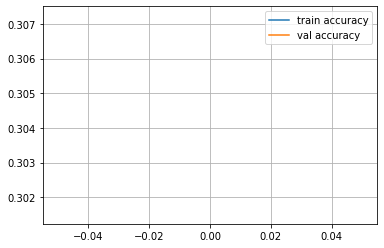

Epoch 1
Train accuracy: 0.2920185810810811
Val accuracy: 0.2961320522296132


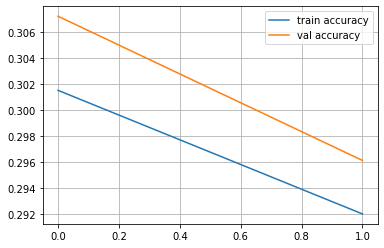

Epoch 2
Train accuracy: 0.28093327702702703
Val accuracy: 0.28233555062823357


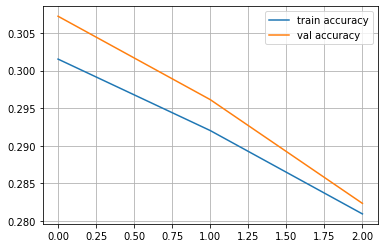

Epoch 3
Train accuracy: 0.2713260135135135
Val accuracy: 0.27666913032766693


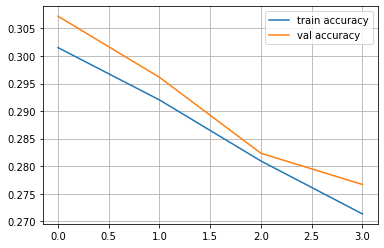

Epoch 4
Train accuracy: 0.2663640202702703
Val accuracy: 0.27297363882729736


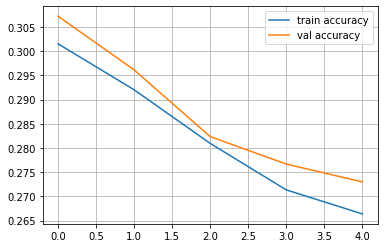

precision: 0.28986764449614805
recall: 0.2711750930513957
f1: 0.24151781951281204
accuracy: 0.27297363882729736
Confusion matrix: 
[[ 248 1036   83]
 [ 415  731  221]
 [ 127 1069  129]]


In [34]:

train_our_network(network, 5, x_train, y_train, x_test, y_test)

Epoch 0
Train accuracy: 0.26573057432432434
Val accuracy: 0.26878541512687854


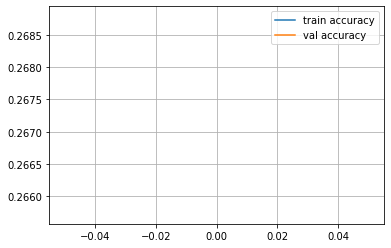

Epoch 1
Train accuracy: 0.26815878378378377
Val accuracy: 0.27149544222714955


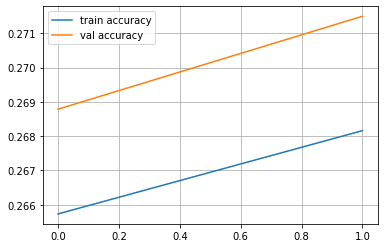

Epoch 2
Train accuracy: 0.2749155405405405
Val accuracy: 0.2793791574279379


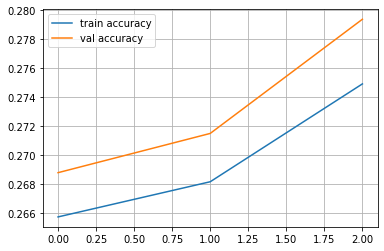

Epoch 3
Train accuracy: 0.28631756756756754
Val accuracy: 0.2902192658290219


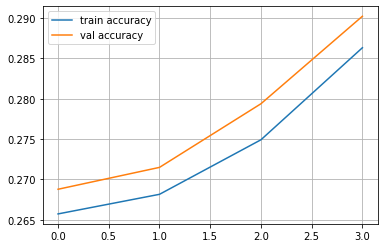

Epoch 4
Train accuracy: 0.2946579391891892
Val accuracy: 0.29859571322985956


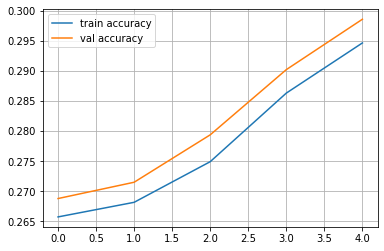

Epoch 5
Train accuracy: 0.31144425675675674
Val accuracy: 0.31534860803153486


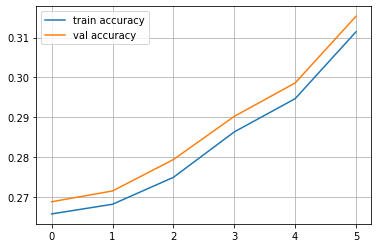

Epoch 6
Train accuracy: 0.32823057432432434
Val accuracy: 0.3323478689332348


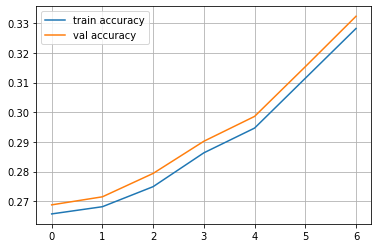

Epoch 7
Train accuracy: 0.3461782094594595
Val accuracy: 0.3530426213353043


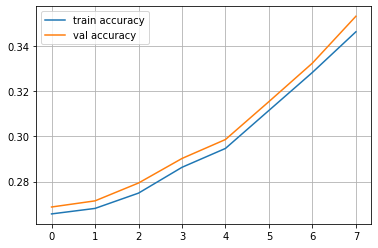

Epoch 8
Train accuracy: 0.3662373310810811
Val accuracy: 0.3720128110372013


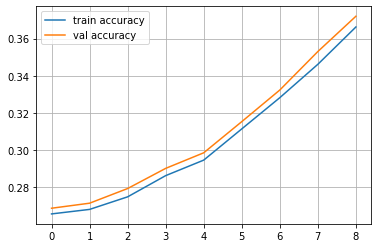

Epoch 9
Train accuracy: 0.38091216216216217
Val accuracy: 0.3917220990391722


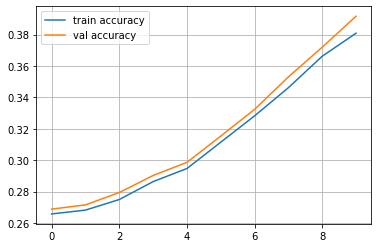

Epoch 10
Train accuracy: 0.3999155405405405
Val accuracy: 0.40527223454052724


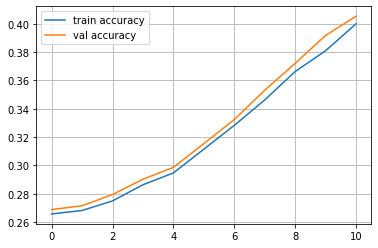

Epoch 11
Train accuracy: 0.4116342905405405
Val accuracy: 0.4178369056417837


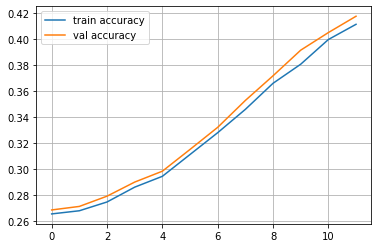

Epoch 12
Train accuracy: 0.42124155405405406
Val accuracy: 0.4279379157427938


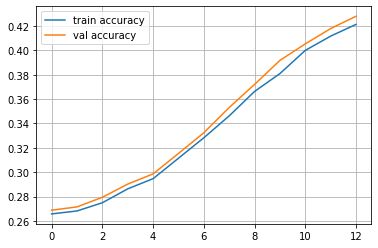

Epoch 13
Train accuracy: 0.4289484797297297
Val accuracy: 0.43311160384331115


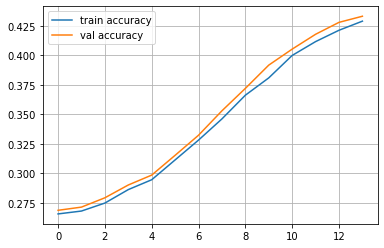

Epoch 14
Train accuracy: 0.43369932432432434
Val accuracy: 0.43680709534368073


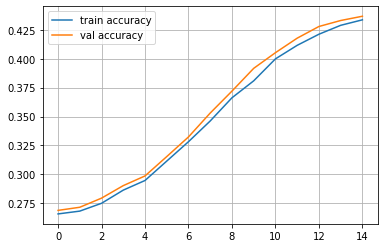

Epoch 15
Train accuracy: 0.4365498310810811
Val accuracy: 0.44050258684405025


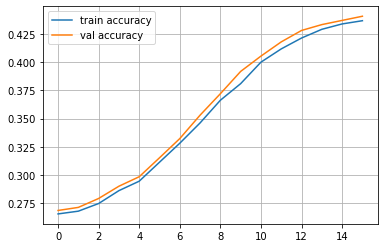

Epoch 16
Train accuracy: 0.4399282094594595
Val accuracy: 0.4414880512441488


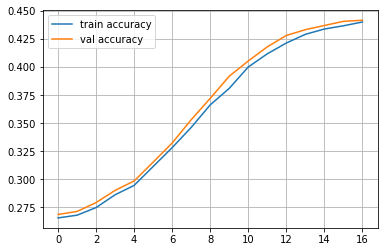

Epoch 17
Train accuracy: 0.44330658783783783
Val accuracy: 0.44395171224439517


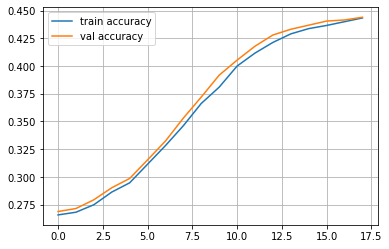

Epoch 18
Train accuracy: 0.4458403716216216
Val accuracy: 0.4451835427445184


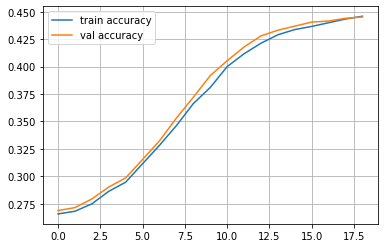

Epoch 19
Train accuracy: 0.4462626689189189
Val accuracy: 0.448139935944814


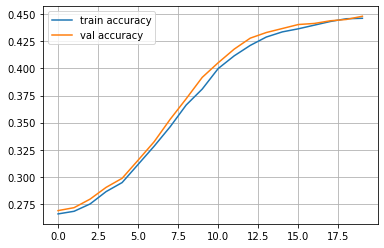

Epoch 20
Train accuracy: 0.44858530405405406
Val accuracy: 0.4501108647450111


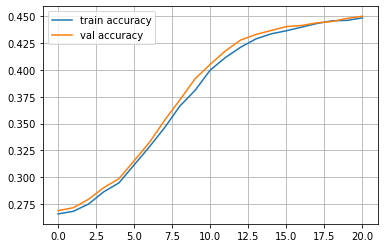

Epoch 21
Train accuracy: 0.44985219594594594
Val accuracy: 0.4515890613451589


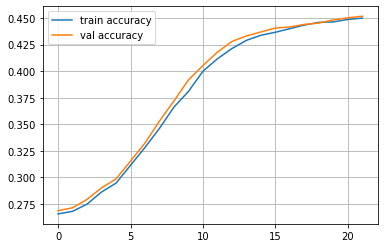

Epoch 22
Train accuracy: 0.45154138513513514
Val accuracy: 0.4523281596452328


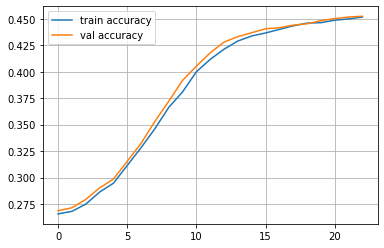

Epoch 23
Train accuracy: 0.45333614864864863
Val accuracy: 0.4530672579453067


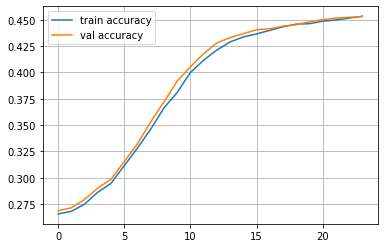

Epoch 24
Train accuracy: 0.4553420608108108
Val accuracy: 0.4555309189455531


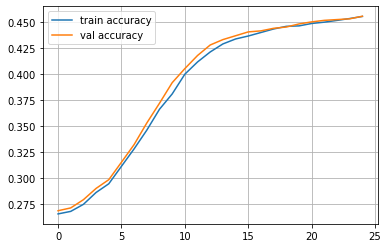

precision: 0.4443907943212611
recall: 0.4575747286671912
f1: 0.38740351663815203
accuracy: 0.4555309189455531
Confusion matrix: 
[[921  42 404]
 [671  60 636]
 [416  41 868]]


In [35]:

train_our_network(network, 25, x_train, y_train, x_test, y_test)

## Final comments:
---

Comparing the values of f1 we notice that the best classifier is MLP. We also notice that kNN is better than Naive Bayes.